<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/EcuacionesDiferenciales2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones diferenciales

# Ecuaciones diferenciales

### Solución sobre valores o rangos infinitos

Hasta el momento, hemos encontrado la solución diferencial de un punto inicial desde una condición inical a una distancia finita en t, pero en algunos casos, necesitamos mapear $t\rightarrow\infty$. Algo de naturaleza asintótica.

Si hacemos un cambio de variable:

$$u=\frac{t}{1+t}$$

$$t=\frac{u}{1-u}$$

De esta manera mientras $t\rightarrow\infty$ entonces  $u\rightarrow 1$.

Ahora tenemos que encontrar la diferencial usando esta variable para posteriormente integrar. Por regla de la cadena tenemos que:

$$\frac{dx}{dt}=\frac{dx}{du}\frac{du}{dt}  = f(x,t)$$
$$\frac{dx}{du} =\frac{dt}{du}f(x,\frac{u}{1-u})$$
pero, $$\frac{dt}{du}=\frac{1}{(1-u)^2}$$
Entonces,
$$
\frac{dx}{du}=\frac{1}{(1-u)^2}f(x,\frac{u}{1-u})
$$

Definimos una nueva función

$$
g(x,u)=(1-u)^{-2}f(x,\frac{u}{1-u})
$$

y la ecuación diferencial a programar es

$$
\frac{dx}{du}=g(x,u)
$$

Digamos que tenemos la siguiente ecuación:

$$
\frac{dx}{dt} = \frac{1}{x^2+t^2}
$$

Y la queremos resolver, $t$ va de cero a infinito y ponemos como condición inicial en $x$ que sea igual a uno cuando $t=0$ Encuentra $g(x,u)$ y escribe su expresion en la casilla de abajo.

# Respuesta aqui!

Ahora acompleta el código (Runge-Kutta de orden 4) para resolverla.

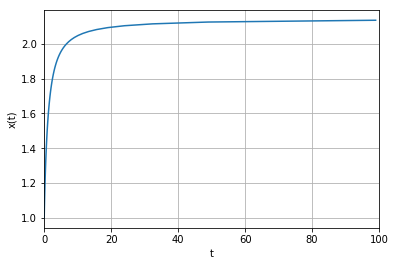

In [ ]:
from pylab import *

def g(x,u):
    #######llenar#######
    pass

a,b= ####poner rango####

N=100
h=(b-a)/N
lista_u=arange(a,b,h) #en el espacio de (u,x)
lista_t,lista_x=[],[]
x= #####aqui valor inicial#####
for u in lista_u:
    lista_t.append(u/(1-u)) #para plotear con respecto a t
    lista_x.append(x)
    k1=h*g(x,u)
    k2=h*g(x+0.5*k1,u+0.5*h)
    k3=h*g(x+0.5*k2,u+0.5*h)
    k4=h*g(x+k3,u+h)
    x+=(k1+2*k2+2*k3+k4)/6
plot(lista_t,lista_x)
xlim(0,100)
grid(True)
xlabel('t')
ylabel('x(t)')
show()

## Ecuaciones Diferenciales con más de una variable

Digamos que tenemos un sistema de ecuaciones diferenciales simultaneas donde la derivada de cada variable puede depender del resto. Un ejemplo es:

$$
\frac{dx}{dt}= xy-x, \frac{dy}{dt}=y-xy+sin^2(wt)
$$

Donde $t$ sigue siendo la única variable independiente. Noten que son ecuaciones diferenciales ordinarias, no son ecuaciones diferenciales parciales!!

Podemos expresar el sistema de forma más general como:

$$
\frac{dx}{dt}= f_x(x,y,t), \frac{dy}{dt}=f_y(x,y,t)
$$

Para un número arbitrario de variables estas ecuaciones se pueden generalizar usando notación vectorial.

$$
\frac{d\mathbf{r}}{dt} = \mathbf{f}(\mathbf{r},t)
$$

Donde $\mathbf{r} = (x,y,\ldots)$ y $\mathbf{f} = (f_x(\mathbf{r},t), f_y(\mathbf{r},t), \ldots)$

Podemos obtener de el método de Euler para varias variables de la siguiente forma (expandimos en serie de Taylor):

$$
\mathbf{r}(t+h)=\mathbf{r}(t)+h\frac{d\mathbf{r}}{dt}+O(h^2)\\
       =\mathbf{r}(t)+h\mathbf{f}(x,t)+O(h^{2})
$$

Ignorando términos de orden cuadrático obtenemos por fín el método de Euler multivariable:

$$
\mathbf{r}(t+h)=\mathbf{r}(t)+h\mathbf{f}(x,t)
$$

Y de la misma manera se puede generalizar Runge-Kutta:

$$
\mathbf{k_1}=h\mathbf{f}(\mathbf{r},t)
$$

$$
\mathbf{k_2}=h\mathbf{f}(\mathbf{r}+0.5\mathbf{k_1},t+0.5h)
$$

$$
\mathbf{k_3}=h\mathbf{f}(\mathbf{r+}0.5\mathbf{k_2},t+0.5h)
$$

$$
\mathbf{k_4}=h\mathbf{f}(\mathbf{r}+\mathbf{k_3},t+h)
$$

$$
\mathbf{r(t+h)}=\mathbf{r}(t)+\frac{(\mathbf{k_1+2k_2+2k_3+k_4)}}{6.}
$$

Resuelve la expresión al inicio de esta sección en el rango $t=0$ hasta $t=10$ usando $\omega=1$ y con condiciones iniciales $x=y=1$ en $t=0$:

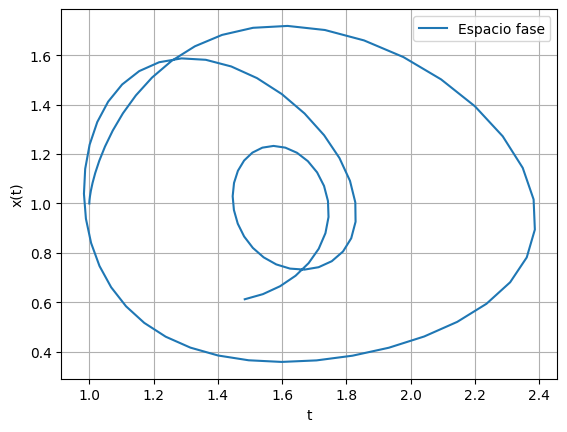

In [ ]:
#Euler vectorial
from pylab import *

def f(r,t):
    x=r[0]
    y=r[1]
    fx=x*y-x
    fy=y-x*y+(sin(t))**2
    return array([fx,fy],float)

def Euler_2d(fv,a,b,r,N):
  h=abs(b-a)/N
  lista_t=arange(a,b,h)
  lista_x,lista_y=[],[]
  for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    r+=h*fv(r,t)
  return lista_t,lista_x,lista_y

lista_t,lista_x,lista_y=Euler_2d(f,0.0,10.0,array([1.0,1.0],float),100)
#plot(lista_t,lista_x, label='x')
#plot(lista_t,lista_y, label='y')
plot(lista_x,lista_y, label='Espacio fase')
#xlim(0,10)
grid(True)
xlabel('t')
ylabel('x(t)')
legend()
show()

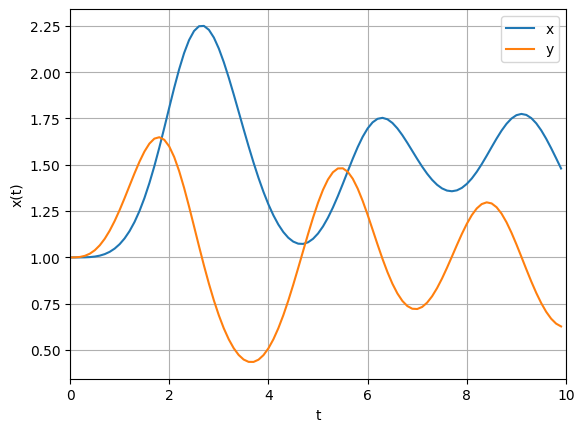

In [ ]:
#Euler vectorial

from pylab import *
def f(r,t):
    x=r[0]
    y=r[1]
    fx=x*y-x
    fy=y-x*y+(sin(t))**2
    return array([fx,fy],float)
def RK2_2d(fv,a,b,r,N):
  h=abs(b-a)/N
  lista_t=arange(a,b,h)
  lista_x,lista_y=[],[]
  for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*fv(r,t)
    k2=h*fv(r+0.5*k1,t+0.5*h)
    r+=k2
  return lista_t,lista_x,lista_y

lista_t,lista_x,lista_y=RK2_2d(f,0.0,10.0,array([1.0,1.0],float),100)
plot(lista_t,lista_x, label='x')
plot(lista_t,lista_y, label='y')
xlim(0,10)
grid(True)
xlabel('t')
ylabel('x(t)')
legend()
show()

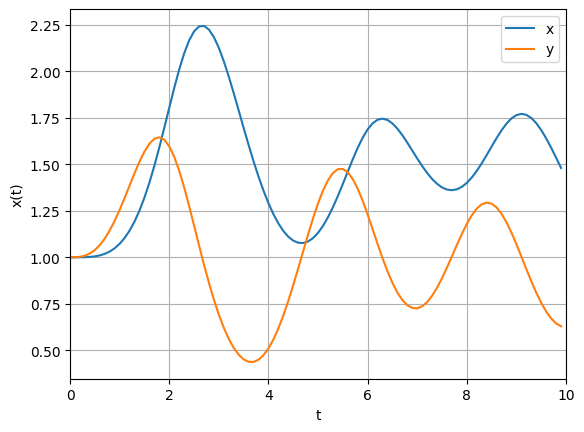

In [ ]:
#Euler vectorial

from pylab import *
def f(r,t):
    x=r[0]
    y=r[1]
    fx=x*y-x
    fy=y-x*y+(sin(t))**2
    return array([fx,fy],float)
def RK4_2d(fv,a,b,r,N):
  h=abs(b-a)/N
  lista_t=arange(a,b,h)
  lista_x,lista_y=[],[]
  for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*fv(r,t)
    k2=h*fv(r+0.5*k1,t+0.5*h)
    k3=h*fv(r+0.5*k2,t+0.5*h)
    k4=h*fv(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6
  return lista_t,lista_x,lista_y

lista_t,lista_x,lista_y=RK4_2d(f,0.0,10.0,array([1.0,1.0],float),100)
plot(lista_t,lista_x, label='x')
plot(lista_t,lista_y, label='y')
xlim(0,10)
grid(True)
xlabel('t')
ylabel('x(t)')
legend()
show()

## Módelo depredador y presa (Lotka-Volterra)

Es interesante para representar interacciones de depredador-presa en sistemas biológicos.

Tradicionalmente se habla de conejos (presa, $x$) y zorros (depredador, $y$). Las cantidades $x,y$ se piensan normalmente en los miles.

Los conejos se reproducen en una tasa proporcional a su población misma, pero son devorados en una tasa proporcional a su población y a la población de zorros:


$$
\frac{dx}{dt} = \alpha x - \beta x y
$$

Donde $\alpha$ y $\beta$ son constantes. A su vez los zorros se reproducen a una tasa proporcional a la tasa que devoran conejos, pero se mueren a una tasa proporcional a su población misma (por edad avanzada).

$$
\frac{dy}{dt} = \gamma x y - \delta y
$$

a) Escribe un programa para resolver estas ecuaciones usando Runge-Kutta de cuarto orden para el caso $\alpha=1$, $\beta=\gamma=0.5$ y $\delta = 2$ empezando de la condición inicial $x=y=2$ (i.e. 2000 conejos y dos mil zorros). Has que el programa haga una gráfica mostrando tanto $x$ como $y$ como función del tiempo usando como mismo eje $t$ que vaya desde cero hasta 30. NOTA: A pesar de que no hay dependencia explícita de $t$ es conveniente escribir la función de la forma $f(\mathbf{r},t)$ incluyendo la variable temporal para no tener que reescribir nada.

b) plotea zorros vs conejos.

c) describe lo que sucede usando ambas gráficas en términos de zorros y conejos.

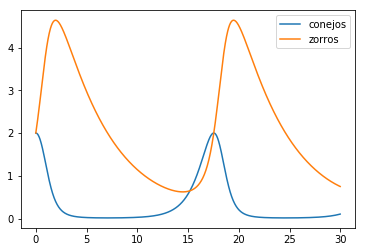

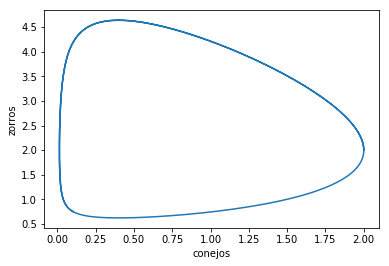

In [ ]:
from pylab import *
def f(r,t):
   pass

a,b=0.0,30.0
N=1000
h=(b-a)/N
lista_t=arange(a,b,h)
lista_x,lista_y=[],[]
r=array([2.0,2.0],float) #condiciones iniciales
alpha,beta,gamma,delta=1.0,0.5,0.5,0.2
for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
plot(lista_t,lista_x,label='conejos')
plot(lista_t,lista_y,label='zorros')
legend()
show()
plot(lista_x,lista_y) #espacio fase
xlabel('conejos')
ylabel('zorros')
show()

# Ecuaciones de Lorenz

De las ecuaciones diferenciales más conocidas:

$$
\frac{dx}{dt}=\sigma(y-x), \frac{dy}{dt}=rx-y-xz, \frac{dz}{dt}=xy-bz
$$

Donde $\sigma, r$ y $b$ son constantes.

Estudiadas por Edward Lorenz en 1963, para estudiar patrones de clima simplificados. Son famosas por ser de los primeros ejemplos de caos determinista, apariencia de movimiento aleatorio a pesar de que no hay aleatoridad en las ecuaciones.

a) Escribe un programa para resolver las ecuaciones de Lorenz (usando Runge-Kutta de orden 4) para el caso $\sigma=10, r=28$ y $b=\frac{8}{3}$ donde t va de 0 a 50 con las condiciones iniciales $(x,y,z) = (0,1,0)$. Haz que el programa grafique $y$ como función del tiempo.

b) Modifica tu programa para producir una gráfica de $z$ vs $x$. Deberías de ver el famoso atractor extraño  de las ecuaciones de Lorenz.

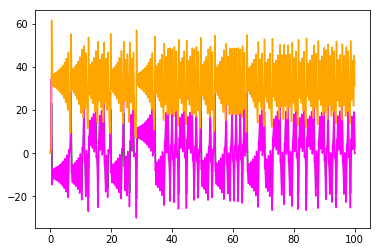

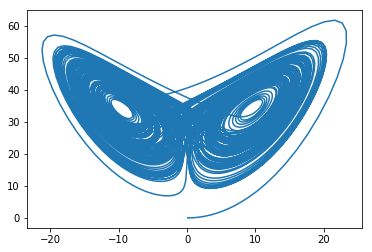

In [ ]:
#Escribir codigo aqui